In [1]:
import os
import numpy as np
from PIL import Image
import cv2
from IPython.display import display, clear_output
from astropy.visualization import ZScaleInterval, ImageNormalize
import matplotlib.pyplot as plt
import data_utils
from tqdm import tqdm
from matplotlib.backends.backend_pdf import PdfPages
import matplotlib.colors as mcolors
from matplotlib.colors import ListedColormap
from matplotlib.colors import LinearSegmentedColormap
import glob

dataset = 'peteZS'
prompt = True

In [2]:
def print_stats(c):
    c_zero = np.count_nonzero(c == 0)
    s = 'Num zeros: '+str(c_zero)
    s += '\nZero ratio: '+str(c_zero/c.size)
    s += '\nMin: '+str(c.min())
    s += '\nMax: '+str(c.max())
    s += '\nMed: '+str(np.median(c))
    s += '\nAvg: '+str(c.mean())
    s += '\nStd: '+str(c.std())+'\n'
    print(s)
    
def separate_channels(img_data):
    red = img_data[:, :, 0]
    blue = img_data[:, :, 2]
    print('Radio (red channel) stats:')
    print_stats(red)
    print('H-Alpha (blue channel) stats:')
    print_stats(blue)
    return red, blue

Image 11



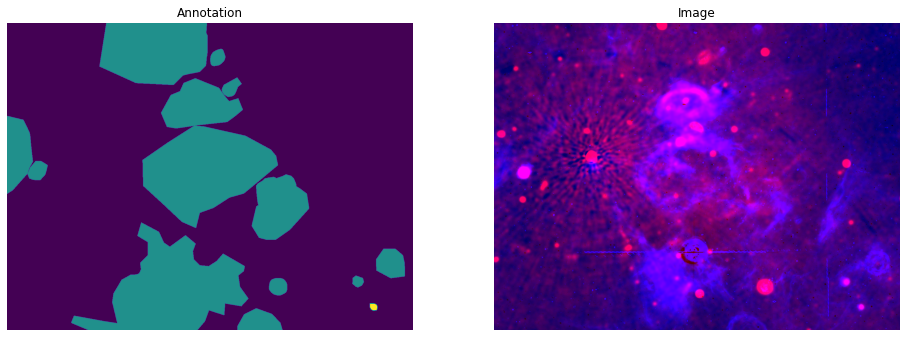

In [ ]:
# Display anns (New Attempt)

idx = 0

dr = os.path.join('DATASET',dataset,'data','my_dataset','img','train')
entries = glob.glob(f"{dr}/*")
while True:
    print('Image '+str(idx)+'\n')
    entry = entries[idx]
    img = np.load(entry)
    img = data_utils.float_to_int(img, make3channel=True)
    ann = Image.open(data_utils.get_companion(entry))
    fig, axs = plt.subplots(1, 2, figsize=(16,8))
    axs[0].imshow(ann)
    axs[0].set_title('Annotation')
    axs[0].axis('off')
    
    axs[1].imshow(img)
    axs[1].set_title('Image')
    axs[1].axis('off')
    
    plt.show()
    if prompt:
        action = input('Press enter for next image, \'p\' for previous image, or enter image id. \'q\' to quit')
        if action.isdigit():
            idx = int(action)
        elif action == 'p':
            idx = idx-1
        elif action == 'q':
            break
        else:
            idx = idx+1
        clear_output(wait=True)
    else:
        plt.close()
        break
    plt.close()

Image 14

Raw Data
Radio (red channel) stats:
Num zeros: 131406
Zero ratio: 0.239393127872723
Min: 0
Max: 255
Med: 255.0
Avg: 192.30901618289238
Std: 109.1501240288855

H-Alpha (blue channel) stats:
Num zeros: 295
Zero ratio: 0.0005374257851426365
Min: 0
Max: 255
Med: 127.0
Avg: 145.6914756983347
Std: 39.16023079418463



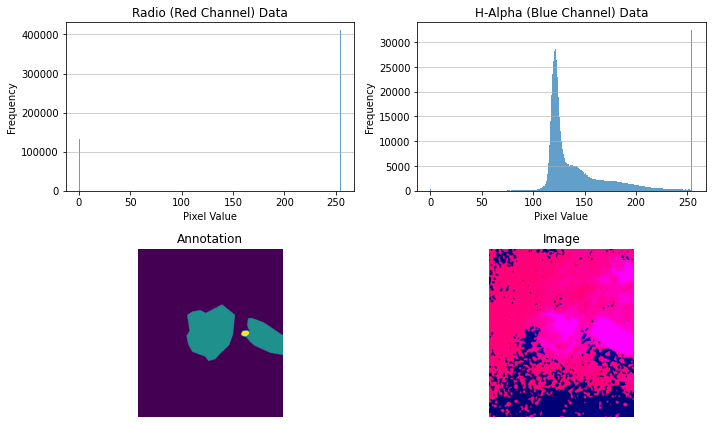

In [ ]:
# Display Histograms


img_dir_path = os.path.join('DATASET',dataset,'data','my_dataset','img','train')
ann_dir_path = os.path.join('DATASET',dataset,'data','my_dataset','ann','train')

shape = (600,600)
histrange = (0,255)
bins=255
idx = 0

dr = os.path.join('DATASET',dataset,'data','my_dataset','img','train')
entries = glob.glob(f"{dr}/*")
    
while True:
    print('Image '+str(idx)+'\n')
    entry = entries[idx]
    
    # Img
    img = data_utils.float_to_int(np.load(entry), make3channel=True)
    
    # Ann
    ann = Image.open(data_utils.get_companion(entry))
    
    # Red and Blue
    print('Raw Data')
    red, blue = separate_channels(img)
    
    # Plot
    fig, axs = plt.subplots(2, 2, figsize=(10,6))
    axs[0,0].hist(red.ravel(), bins=bins, range=histrange, alpha=0.7)
    axs[0,0].set_title('Radio (Red Channel) Data')
    axs[0,0].set_xlabel('Pixel Value')
    axs[0,0].set_ylabel('Frequency')
    axs[0,0].grid(axis='y', alpha=0.75)
    
    axs[0,1].hist(blue.ravel(), bins=bins, range=histrange, alpha=0.7)
    axs[0,1].set_title('H-Alpha (Blue Channel) Data')
    axs[0,1].set_xlabel('Pixel Value')
    axs[0,1].set_ylabel('Frequency')
    axs[0,1].grid(axis='y', alpha=0.75)
    
    axs[1,0].imshow(ann)
    axs[1,0].set_title('Annotation')
    axs[1,0].axis('off')
    
    axs[1,1].imshow(img)
    axs[1,1].set_title('Image')
    axs[1,1].axis('off')
    
    plt.tight_layout()
    plt.show()
    if prompt:
        action = input('Press enter for next image, \'p\' for previous image, or enter image id. \'q\' to quit')
        if action.isdigit():
            idx = int(action)
        elif action == 'p':
            idx = idx-1
        elif action == 'q':
            break
        else:
            idx = idx+1
        if idx < 0:
            idx = 0
        if idx > 309:
            idx = 309
        clear_output(wait=True)
    else:
        plt.close()
        break
    plt.close()

In [ ]:
# Saves a PDF with only the images

pdf_path = os.path.join('DATASET',dataset,'imgs.pdf')
size = (500,500)

# Obtain numpy images
images, anns = data_utils.get_image_data(dataset=dataset, imgset='val', includeAnn=False)
images = data_utils.npyToImage(images, size=size)
images[0].save(
    pdf_path, "PDF" ,resolution=100.0, save_all=True, append_images=images[1:]
)

print('Saved ' + pdf_path)